# COGS 118A Group 035 Wi23
### Group Memebers:
<ul >
  <li style="padding-left: 20px;"> Jamie Wei (A15921963) </li>
  <li style="padding-left: 20px;"> Nicole Rangan (A15011222) </li>
  <li style="padding-left: 20px;"> Sarita Raghunath (A16425750) </li>
  <li style="padding-left: 20px;"> Zehong Li (A15852954) </li>
</ul>


**NOTICE! Running our model requires Tensorflow. The development is constructed with Pip (22.2), Python (3.9.13), and Tensorflow (2.11.0)**

In [1]:
#%pip install tensorflow==2.11.*

In [2]:
#%pip install -q -U keras-tuner

In [3]:
#compatibility check
import sys
print(sys.version)
import pip
print(pip.__version__)

3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
22.2


In [44]:
#necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

In [5]:
#assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert tf.__version__ >= '2.0.0'
assert plt
assert Sequential
assert Dense
assert Dropout
assert BatchNormalization
assert Adam
assert l2
assert train_test_split
assert LabelEncoder
assert kt
assert tf.__version__ >= "2.0.0"

In [6]:
#read csv
df = pd.read_csv('cleaned_data_final.csv')

#a peek at our dataset
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,False,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,True,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,True,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,False,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,False,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,False,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,True,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,False,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,True,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [9]:
#convert numpy arrays of training to tensors, set to tf.float32
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [10]:
X_train_tensor.shape

TensorShape([73270, 246])

In [11]:
#hyperparameter tuning dictionary that will be searched on
params = {
    'learning_rate': [0.001, 0.01],
    'hidden_layers': [1, 2, 3],
    'nodes': [32, 64],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'regularization_strength': [0.01, 0.1]
}

In [12]:
# define a function to create the Keras model
def create_model(learning_rate=0.01, hidden_layers=1, nodes=32, activation='relu', regularization_strength=0.01):
    model = Sequential()
    model.add(Dense(nodes, activation=activation, input_shape=(246,), kernel_regularizer=l2(regularization_strength)))
    model.add(BatchNormalization())
    for i in range(hidden_layers):
        model.add(Dense(nodes, activation=activation, kernel_regularizer=l2(regularization_strength)))
        model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose=0)

C:\Users\Dominic\AppData\Local\Temp\ipykernel_137168\3625288076.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose=0)


In [13]:
# perform the grid search
grid = GridSearchCV(estimator=model, param_grid=params, cv=2, verbose=3)
grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.544 total time=   3.2s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.539 total time=   3.0s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.1;, score=0.498 total time=   3.2s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.1;, score=0.500 total time=   3.0s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strength=0.01;, score=0.545 total time=   3.1s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strength=0.01;, score=0.544 total time=   3.2s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strengt

[CV 2/2] END activation=sigmoid, hidden_layers=1, learning_rate=0.01, nodes=32, regularization_strength=0.1;, score=0.501 total time=   3.4s
[CV 1/2] END activation=sigmoid, hidden_layers=1, learning_rate=0.01, nodes=64, regularization_strength=0.01;, score=0.498 total time=   3.3s
[CV 2/2] END activation=sigmoid, hidden_layers=1, learning_rate=0.01, nodes=64, regularization_strength=0.01;, score=0.501 total time=   3.2s
[CV 1/2] END activation=sigmoid, hidden_layers=1, learning_rate=0.01, nodes=64, regularization_strength=0.1;, score=0.502 total time=   3.3s
[CV 2/2] END activation=sigmoid, hidden_layers=1, learning_rate=0.01, nodes=64, regularization_strength=0.1;, score=0.501 total time=   3.3s
[CV 1/2] END activation=sigmoid, hidden_layers=2, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.502 total time=   3.4s
[CV 2/2] END activation=sigmoid, hidden_layers=2, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.499 total time=   3.4s
[CV 1/2

[CV 1/2] END activation=tanh, hidden_layers=2, learning_rate=0.001, nodes=64, regularization_strength=0.1;, score=0.498 total time=   3.6s
[CV 2/2] END activation=tanh, hidden_layers=2, learning_rate=0.001, nodes=64, regularization_strength=0.1;, score=0.501 total time=   3.6s
[CV 1/2] END activation=tanh, hidden_layers=2, learning_rate=0.01, nodes=32, regularization_strength=0.01;, score=0.502 total time=   3.4s
[CV 2/2] END activation=tanh, hidden_layers=2, learning_rate=0.01, nodes=32, regularization_strength=0.01;, score=0.499 total time=   3.4s
[CV 1/2] END activation=tanh, hidden_layers=2, learning_rate=0.01, nodes=32, regularization_strength=0.1;, score=0.498 total time=   3.4s
[CV 2/2] END activation=tanh, hidden_layers=2, learning_rate=0.01, nodes=32, regularization_strength=0.1;, score=0.501 total time=   3.7s
[CV 1/2] END activation=tanh, hidden_layers=2, learning_rate=0.01, nodes=64, regularization_strength=0.01;, score=0.502 total time=   3.6s
[CV 2/2] END activation=tanh,

In [14]:
print(grid_result.best_params_)

{'activation': 'tanh', 'hidden_layers': 2, 'learning_rate': 0.001, 'nodes': 64, 'regularization_strength': 0.01}


In [15]:
best_params = grid_result.best_params_

model = create_model(learning_rate=best_params['learning_rate'], 
                     hidden_layers=best_params['hidden_layers'], 
                     nodes=best_params['nodes'], 
                     activation=best_params['activation'], 
                     regularization_strength=best_params['regularization_strength'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2290/2290 [==============================] - 5s 2ms/step - loss: 0.9568 - accuracy: 0.5302 - val_loss: 0.6966 - val_accuracy: 0.5365
Epoch 2/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6978 - accuracy: 0.5349 - val_loss: 0.6965 - val_accuracy: 0.5421
Epoch 3/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6995 - accuracy: 0.5371 - val_loss: 0.7037 - val_accuracy: 0.5370
Epoch 4/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6990 - accuracy: 0.5425 - val_loss: 0.6950 - val_accuracy: 0.5417
Epoch 5/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6964 - accuracy: 0.5460 - val_loss: 0.6975 - val_accuracy: 0.5485
Epoch 6/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6952 - accuracy: 0.5469 - val_loss: 0.6931 - val_accuracy: 0.5445
Epoch 7/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.5493 - val_loss: 0.6942 - val_ac

2290/2290 [==============================] - 4s 2ms/step - loss: 0.6908 - accuracy: 0.5505 - val_loss: 0.6904 - val_accuracy: 0.5486
Epoch 58/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6906 - accuracy: 0.5503 - val_loss: 0.6907 - val_accuracy: 0.5455
Epoch 59/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6909 - accuracy: 0.5504 - val_loss: 0.6897 - val_accuracy: 0.5453
Epoch 60/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6905 - accuracy: 0.5519 - val_loss: 0.6916 - val_accuracy: 0.5480
Epoch 61/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6905 - accuracy: 0.5494 - val_loss: 0.6902 - val_accuracy: 0.5449
Epoch 62/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6906 - accuracy: 0.5529 - val_loss: 0.6896 - val_accuracy: 0.5496
Epoch 63/100
2290/2290 [==============================] - 4s 2ms/step - loss: 0.6905 - accuracy: 0.5515 - val_loss: 0.6907 - val_accuracy

In [16]:
#evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

573/573 [==============================] - 1s 895us/step - loss: 0.6894 - accuracy: 0.5508
Test Loss: 0.6894
Test Accuracy: 0.5508


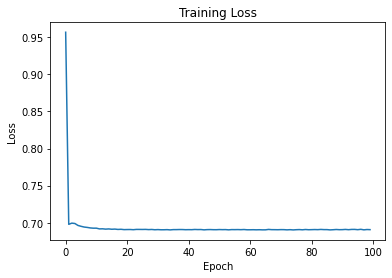

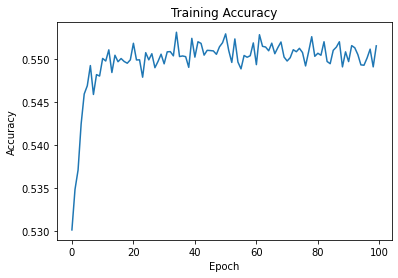

In [17]:
#training loss plot
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#training accuracy plot
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [52]:
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()

    # classification report
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te))
    print()

    # confusion matrix
    conf_matrix = confusion_matrix(y_te, yhat_te)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    balanced_accuracy = (specificity + tp / (tp + fn)) / 2

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ConfusionMatrixDisplay.from_predictions(y_te, yhat_te, ax=axes[0])
    roc_display = RocCurveDisplay.from_predictions(y_te, yhat_te, ax=axes[1])
    roc_display.plot()
    axes[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    axes[1].set_title('ROC Curve')
    plt.show()

    print(f"Specificity: {specificity:.3f}")
    print(f"Negative Predictive Value: {npv:.3f}")
    print(f"False Positive Rate: {fpr:.3f}")
    print(f"False Negative Rate: {fnr:.3f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.3f}")


In [53]:
yhat_te_prob = model.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = model.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

2290/2290 [==============================] - 3s 1ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [54]:
yhat_tr.shape

(73270, 1)

training set accuracy (n=73270): 0.560
test set accuracy (n=18318): 0.551

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.55      0.52      0.53      9062
           1       0.55      0.59      0.57      9256

    accuracy                           0.55     18318
   macro avg       0.55      0.55      0.55     18318
weighted avg       0.55      0.55      0.55     18318




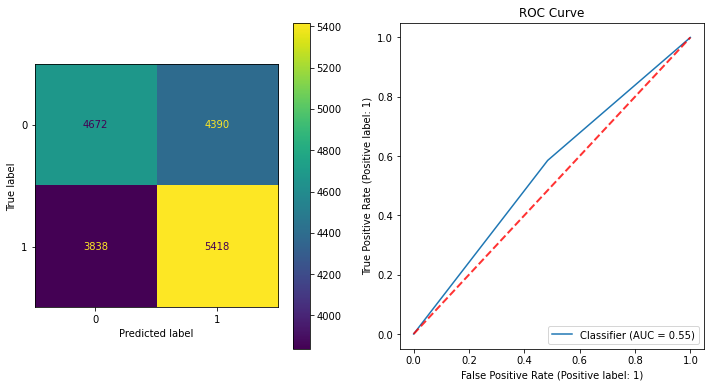

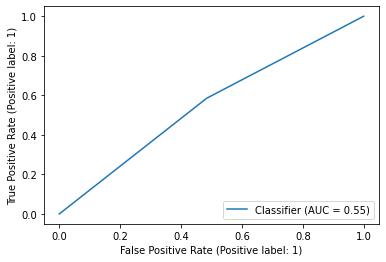

Specificity: 0.516
Negative Predictive Value: 0.549
False Positive Rate: 0.484
False Negative Rate: 0.415
Balanced Accuracy: 0.550


In [55]:
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'unscaled')